In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")

symulation_LEBR = np.load("powers/LEBR_powr.npy")
symulation_ILEBR = np.load("powers/ILEBR_powr.npy")
symulation_ILEBR2 = np.load("powers/ILEBR2_powr.npy")
symulation_ILEBR_star = np.load("powers/ILEBR_star_powr.npy")
symulation_ILEBR_star2 = np.load("powers/ILEBR_star2_powr.npy")

symulation_t_LEBR = np.load("nr_of_games_to_play/LEBR_t.npy")
symulation_t_ILEBR = np.load("nr_of_games_to_play/ILEBR_t.npy")
symulation_t_ILEBR2 = np.load("nr_of_games_to_play/ILEBR2_t.npy")
symulation_t_ILEBR_star = np.load("nr_of_games_to_play/ILEBR_star_t.npy")
symulation_t_ILEBR_star2 = np.load("nr_of_games_to_play/ILEBR_star2_t.npy")
# ps1 = np.arange(0.495, 0.5+0.0005, 0.0005)
# ps2 = np.arange(0, 0.5+0.05, 0.05)
# ps2_star = np.arange(0, 0.5+0.01, 0.01)

ps1 = np.arange(0.495, 0.5 + 0.0005, 0.0005)
ps2 = np.arange(0, 0.5 + 0.05, 0.05)
ps2_star = np.arange(0, 0.5, 0.1)

symulation_p_LEBR = symulation_LEBR[:, :, 0]
symulation_p_ILEBR = symulation_ILEBR[:, :, 0]
symulation_p_ILEBR2 = symulation_ILEBR2[:, :, 0]
symulation_p_ILEBR_star = symulation_ILEBR_star[:, :, 0]
symulation_p_ILEBR_star2 = symulation_ILEBR_star2[:, :, 0]

symulation_t_LEBR = symulation_t_LEBR[:, :, 1]
symulation_t_ILEBR = symulation_t_ILEBR[:, :, 1]
symulation_t_ILEBR2 = symulation_t_ILEBR2[:, :, 1]
symulation_t_ILEBR_star = symulation_t_ILEBR_star[:, :, 1]
symulation_t_ILEBR_star2 = symulation_t_ILEBR_star2[:, :, 1]

In [10]:
np.sum(symulation_p_LEBR > 0.5, 1)/2000, ps1

(array([0.    , 0.    , 0.001 , 0.006 , 0.012 , 0.028 , 0.0565, 0.121 ,
        0.231 , 0.3505, 0.504 ]),
 array([0.495 , 0.4955, 0.496 , 0.4965, 0.497 , 0.4975, 0.498 , 0.4985,
        0.499 , 0.4995, 0.5   ]))

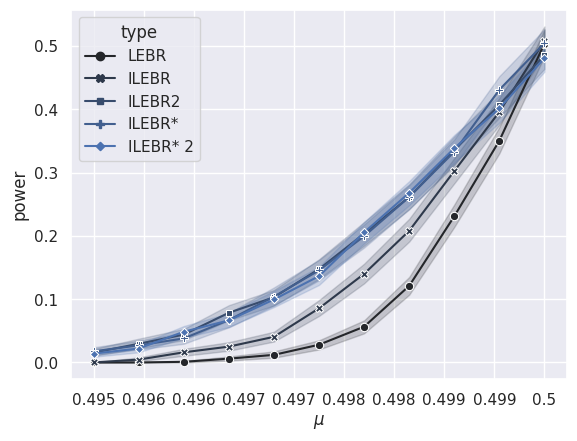

In [7]:
LEBR_df = pd.DataFrame((symulation_p_LEBR>0.5).T.astype(int))
LEBR_df.columns = ps1
LEBR_df = LEBR_df.assign(type = "LEBR")

ILEBR_df = pd.DataFrame((symulation_p_ILEBR>0.5).T.astype(int))
ILEBR_df.columns = ps1
ILEBR_df = ILEBR_df.assign(type = "ILEBR")

ILEBR2_df = pd.DataFrame((symulation_p_ILEBR2>0.5).T.astype(int))
ILEBR2_df.columns = ps1
ILEBR2_df = ILEBR2_df.assign(type = "ILEBR2")

ILEBR_star_df = pd.DataFrame((symulation_p_ILEBR_star>0.5).T.astype(int))
ILEBR_star_df.columns = ps1
ILEBR_star_df = ILEBR_star_df.assign(type = "ILEBR*")

ILEBR_star2_df = pd.DataFrame((symulation_p_ILEBR_star2>0.5).T.astype(int))
ILEBR_star2_df.columns = ps1
ILEBR_star2_df = ILEBR_star2_df.assign(type = "ILEBR* 2")

df = pd.concat([LEBR_df, ILEBR_df, ILEBR2_df, ILEBR_star_df, ILEBR_star2_df])
df = pd.melt(df, id_vars="type")
sns.lineplot(data=df, x="variable", y="value", hue="type", style="type", markers=True,
            dashes=False, palette="dark:b" )
xs = np.linspace(min(ps1),max(ps1),10)
plt.xticks(xs,np.round(xs, 3))
plt.ylabel("power")
plt.xlabel("$\mu$")
plt.savefig("test_powrs.pdf",transparent=True)
plt.show()

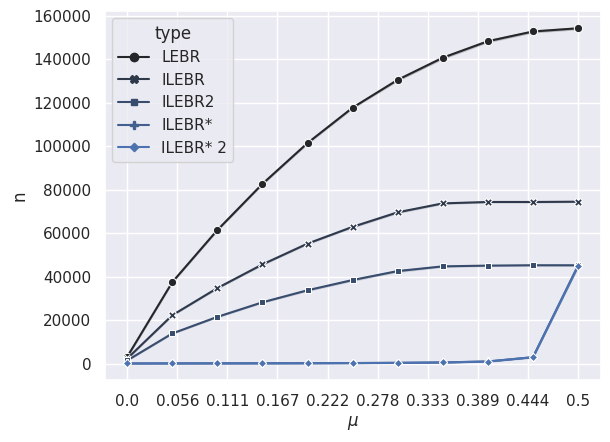

In [6]:

sns.set(style="darkgrid")

LEBR_t_df = pd.DataFrame(symulation_t_LEBR.T)
LEBR_t_df.columns = ps2
LEBR_t_df = LEBR_t_df.assign(type = "LEBR")

ILEBR_t_df = pd.DataFrame(symulation_t_ILEBR.T)
ILEBR_t_df.columns = ps2
ILEBR_t_df = ILEBR_t_df.assign(type = "ILEBR")

ILEBR2_t_df = pd.DataFrame(symulation_t_ILEBR2.T)
ILEBR2_t_df.columns = ps2
ILEBR2_t_df = ILEBR2_t_df.assign(type = "ILEBR2")

ILEBR_t_star_df = pd.DataFrame(symulation_t_ILEBR_star.T)
ILEBR_t_star_df.columns = ps2
ILEBR_t_star_df = ILEBR_t_star_df.assign(type = "ILEBR*")

ILEBR_t_star2_df = pd.DataFrame(symulation_t_ILEBR_star2.T)
ILEBR_t_star2_df.columns = ps2
ILEBR_t_star2_df = ILEBR_t_star2_df.assign(type = "ILEBR* 2")


df_n = pd.concat([LEBR_t_df, ILEBR_t_df, ILEBR2_t_df, ILEBR_t_star_df, ILEBR_t_star2_df])
df_n = pd.melt(df_n, id_vars="type")
sns.lineplot(data=df_n, x="variable", y="value", hue="type", style="type", markers=True,
            dashes=False, palette="dark:b")
xs = np.linspace(min(ps2),max(ps2),10)
plt.xticks(xs,np.round(xs, 3))
plt.ylabel("n")
plt.xlabel("$\mu$")
plt.savefig("needed_games_to_play.pdf",transparent=True)
plt.show()